In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
theta = np.array([[2]])
b = np.array([1])

def f(x: np.ndarray, theta: np.ndarray, b: np.ndarray) -> np.ndarray:
    return x @ theta.T + b

In [3]:
X = np.linspace(-1, 1, 50)[:, None]
Y = f(X, theta, b)

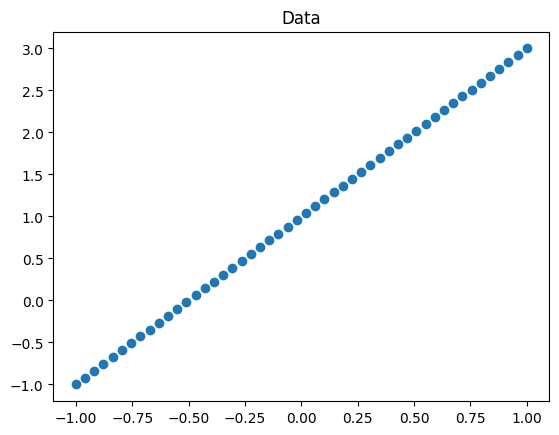

In [4]:
plt.title("Data")
plt.scatter(X, Y)

In [58]:
def fit(X, Y, initial_theta, initial_b, lr=1e-3, epochs: int = 100):
    theta = initial_theta
    b = initial_b

    losses = []
    with tqdm(total=epochs) as pbar:
        for i in range(epochs):
            # get a random mini batch of size 1
            # idx = np.random.randint(0, X.shape[0])
            # x = X[idx: idx + 1]
            # y = Y[idx: idx + 1]

            x = X
            y = Y

            # make prediction
            pred_x = f(x, theta, b)
            
            # compute loss
            loss = np.mean((y - pred_x) ** 2)
            losses.append(loss.item())
            pbar.set_postfix(loss=loss)

            # compute gradients for theta and b
            dtheta = -2 * np.mean((y - pred_x) * X, axis=0, keepdims=True)
            db = -2 * np.mean(y - pred_x)

            # gradient descent
            theta = theta - lr * dtheta
            b = b - lr * db
            
            pbar.update(1)

    return (theta, b), losses

100%|██████████| 5000/5000 [00:01<00:00, 2755.49it/s, loss=0.00055] 


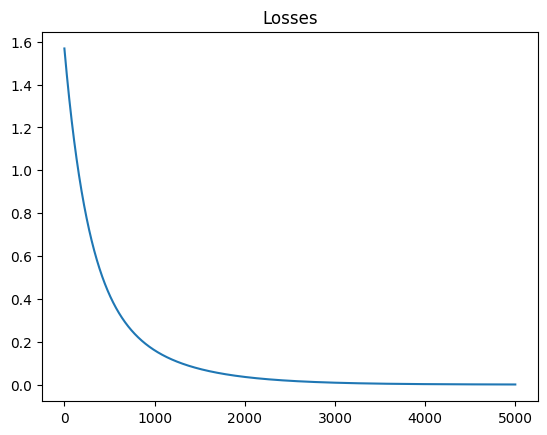

In [59]:
initial_theta = np.random.randn(1, 1)
initial_b = np.zeros(1)
params, losses = fit(X, Y, initial_theta, initial_b, epochs=5000, lr=1e-3)

plt.title("Losses")
plt.plot(losses)

In [61]:
params[0], params[1]

(array([[1.96020351]]), array([0.99995505]))